## k-Nearest Neighbors Algorithm(kNN)

**原理**：通过测量不同特征值之间距离的方法进行分类。

如下图，测试样本（绿色圆形）应归入要么是第一类的蓝色方形或是第二类的红色三角形。如果k=3（实线圆圈）它被分配给第二类，因为有2个三角形和只有1个正方形在内侧圆圈之内。如果k=5（虚线圆圈）它被分配到第一类（3个正方形与2个三角形在外侧圆圈之内）
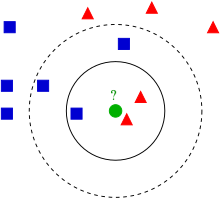


**优点**：精度高、对异常值不敏感、无数据输入假定

**缺点**：计算复杂度高，空间复杂度高

**适应数据**：数值型、标称型



### 一、算法描述
算法：K-近邻法

**输入**：训练数据集

$$ T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\} $$

其中，$x_i\in\chi\subseteq R^n$为实例的特征向量，$y_i\in\gamma=\{c_1,c_2,\cdots,c_K\}$为实例的类别，$i=1,2,\cdots.,N$；实例特征向量$x$

**输出**：实例$x$所属的类$y$

（1）根据给定的距离度量，在训练集$T$中找出与$x$最邻近的$k$个点，涵盖这$k$个点的$x$的邻域记作$N_k(x)$；

（2）在$N_k(x)$中根据分类决策规则（如**多数表决**）决定$x$的类别$y$：

$$y=\underset{c_j}{argmax}\sum_{x_i\in N_k(x)}I(y_i=c_j),\; i=1,2,\cdots,N;\; j=1,2,\cdots,K \;\;\;(\star)$$

式$(\star)$中，$I$为指示函数，即当$y_i=c_j$时$I$为1，否则$I$为0.
    $k$近邻法的特殊情况是$k=1$的情形，称为最近邻算法，对于输入的实例点（特征向量）$x$，最近邻法将训练数据集中与$x$最近邻点的类作为$x$的类.
        
根据算法可知，**k近邻主要的3个问题**：

（1）度量距离的计算

（2）计算出距离排序后选择k个点，k值如何确定

（3）选出k个点后如何进行分类决策

### 二、距离度量
需要计算未知样本与各个训练样本的**距离**（实际上是反应两个实例点的相似程度）。

设两个点$x_i=(x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)}),x_j=(x_j^{(1)},x_j^{(2)},\cdots,x_j^{(n)})$，n表示特征数，距离计算公式：

$L_p(x_i,x_j)=(\sum_{l=1}^{n}|x_i^{(l)}-x_j^{(l)}|^p)^\frac{1}{p}$，其中$p\geq1$

**①欧式距离或几何距离（p=2）**

$L_2(x_i,x_j)=(\sum_{l=1}^{n}|x_i^{(l)}-x_j^{(l)}|^2)^\frac{1}{2}$

**②曼哈顿距离（p=1）**

$L_1(x_i,x_j)=\sum_{l=1}^{n}|x_i^{(l)}-x_j^{(l)}|$

**③坐标距离最大值（p=∞）**

$L_∞(x_i,x_j)=\max_l |x_i^{(l)}-x_j^{(l)}|$


通过计算测试点到存储样本点的距离是比较容易实现的，但它属于**计算密集型**的，特别是当训练样本集变大时，计算量也会跟着增大。随着kNN算法发展，用来减少不必要距离评价的近邻搜索算法已经被提出来。使用一种合适的**近邻搜索算法**能使K近邻算法的计算变得简单许多。

### 三、k值的选择
近似误差与估计误差的区别：
```
近似误差可以理解为对训练集的训练误差，它只能体现对训练数据的拟合表现；
估计误差可以理解为对测试集的测试误差，它可以体现对测试数据的拟合表现，也就是体现出泛化能力，因此对模型要求是估计误差越小越好。
```
如何选择一个最佳的K值取决于数据。一般情况下，在分类时较大的K值能够减小噪声的影响，但会使类别之间的界限变得模糊，近似误差会增大。实际应用中，k值一般取一个比较小的数值，通过交叉验证法来选取最优的k值。一个较好的K值能通过各种启发式技术（见超参数优化）来获取。

### 四、分类决策规则
一般是多数表决

### 五、代码实现
classify0函数的功能是使用k-近邻算法将每组数据划分到某个类中，伪代码如下：

对未知类别属性的数据集中的每个点依次执行以下操作：

（1）计算已知类别数据集中的点与当前点之间的距离；

（2）按照距离递增次序排序；

（3）选取与当前点距离最小的k个点；

（4）确定前k个点所在类别的出现频率；

（5）返回前k个点出现频率最高的类别作为当前点的预测分类。

In [2]:
import numpy as np
import operator

classify0函数有4个输入参数：用于分类的输入向量inX，输入的训练样本dataSet，标签向量labels，用于选择最近邻的数目参数k。其中标签向量的元素数目和矩阵dataSet的行数相同，

In [3]:
"""
Parameters:
    inX - 用于分类的数据(测试集)
    dataSet - 用于训练的数据(训练集)
    labes - 分类标签
    k - kNN算法参数,选择距离最小的k个点
Returns:
    sortedClassCount[0][0] - 分类结果
"""
# 函数说明:kNN算法,分类器
def classify0(inX, dataSet, labels, k):
    # distance caculation:
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    
    # k nearest neighbour:
    sortedDistIndices = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
        
    # Descending sort:
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [4]:
def createDataSet():
    group = array([[1.0,1,1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

### 六、代码分解
numpy的函数shape返回dataSet的行数，即dataSetSize：

In [8]:
# 测试集
inX = [101,20]
# 训练集
group = [[3,104],[2,100],[1,81],[101,10],[99,5],[98,2]]
labels = ['a','a','a','b','b','b']

In [9]:
# 6组二维特征：[3,104],[2,100],[1,81],[101,10],[99,5],[98,2]
dataSet = np.array(group)
dataSetSize = dataSet.shape[0]
print(dataSetSize)

6


在列向量方向上重复inX共1次(横向)，行向量方向上重复inX共dataSetSize次(纵向)，numpy函数tile将数组inX（测试集），按照**二维元组：(dataSetSize,1)** 平铺开来（对应纵铺个数、横铺个数），方便后续运算：

In [10]:
newInx = np.tile(inX, (dataSetSize,1))
print("测试集矩阵：\n")
print(newInx)
print("训练集矩阵：\n")
print(dataSet)

测试集矩阵：

[[101  20]
 [101  20]
 [101  20]
 [101  20]
 [101  20]
 [101  20]]
训练集矩阵：

[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]


在欧式距离公式中计算两个特征向量的距离如下：

$$\sqrt{(x_{A0}-x_{B0})^2+(x_{A1}-x_{B1})^2+\cdots+(x_{Ai}-x_{Bi})^2}$$ 

代码变量**diffMat**表示由$(x_{An}-x_{Bn})$项构成的矩阵.

\*(其中$x$表示特征值，$x_{Ai}$表示特征向量A中的第i个特征值,向量B同理.**实例中i=1**)

In [11]:
diffMat = np.tile(inX,(dataSetSize, 1)) - dataSet
print(diffMat)

[[ 98 -84]
 [ 99 -80]
 [100 -61]
 [  0  10]
 [  2  15]
 [  3  18]]


sqDiffMat即$(x_{A0}-x_{B0})^2$、$(x_{A1}-x_{B1})^2$项组成的**“二维特征相减后平方”**矩阵：

In [12]:
sqDiffMat = diffMat**2
print(sqDiffMat)

[[ 9604  7056]
 [ 9801  6400]
 [10000  3721]
 [    0   100]
 [    4   225]
 [    9   324]]


将所有元素（特征值）相加，sum(0)列相加，sum(1)行相加，然后开方，公式表示：
$$\sqrt{\sum_{i=0}^{n}(x_{Ai}-x_{Bi})^2}=\sqrt{(x_{A0}-x_{B0})^2+(x_{A1}-x_{B1})^2+\cdots+(x_{Ai}-x_{Bi})^2}$$

In [13]:
sqDistances = sqDiffMat.sum(axis=1)
distances = sqDistances**0.5
print(distances)

[129.0736224  127.28314892 117.13667231  10.          15.13274595
  18.24828759]


为了方便确定x最邻近的k个点，需要将上面计算得到的距离数组逆序排列。方法是：使用numpy函数argsort返回distances数组值从小到大排列的索引（这里是**索引3所对应的目标向量点，即\[101 10\]**为**距离最短**）:

In [14]:
sortDistIndices = distances.argsort()
print(sortDistIndices)

[3 4 5 2 1 0]


假设只需要确定x最邻近的3个点。

将classCount字典分解为元组列表，然后导入运算符模块的itemgetter方法，按照第二个元素的次序对元组进行**逆序排序**，即按照从最大到最小次序排序，最后返回频率最高的元素标签：

In [16]:
classCount = {}
k = 3
for i in range(k):
    voteIlabel = labels[sortDistIndices[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1

sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
print(sortedClassCount[0][0])

b
